In [46]:
import spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import matplotlib.pyplot as plt
import random
plt.rcParams["figure.figsize"] = (16,6)

In [48]:
tfVectorizer = CountVectorizer(stop_words='english', max_features=1000, min_df=1, max_df=0.99)
tfidfVectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [24]:
lda = LDA(learning_offset=50., random_state=0)

In [64]:
nmf = NMF(n_components=10)

In [65]:
filenames = ['chaps-firstParas.txt', 'chaps-midParas.txt', 'chaps-lastParas.txt']

In [66]:
def loadAndSample(filename): 
    raw = open(filename).read().split('\n')
    sample = random.sample(raw, 10000)
    return '\n'.join(sample)

In [56]:
rawTexts = [loadAndSample(f) for f in filenames]

In [57]:
colLabels = [fn[6:-4] for fn in filenames]
colLabels

['firstParas', 'midParas', 'lastParas']

In [58]:
docTermMatrix = vectorizer.fit_transform(rawTexts).todense()

In [67]:
tfidfMatrix = tfidfVectorizer.fit_transform(rawTexts).todense()

In [68]:
featNames = vectorizer.get_feature_names()

In [61]:
ldaOut = lda.fit_transform(docTermMatrix)

/home/jon/.local/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [69]:
nmfOut = nmf.fit_transform(tfidfMatrix)

IndexError: index 3 is out of bounds for axis 1 with size 3

In [32]:
lda.components_.shape

(10, 1000)

In [33]:
lda.components_

array([[  0.75240665,   0.67137276,   0.75762037, ...,   0.76441531,
          0.59500104,   0.85813977],
       [  0.59231719,   0.6617377 ,   0.66566824, ...,   0.57742234,
          0.69336824,   0.61208562],
       [  0.84389831,   0.65039007,   0.80848532, ...,   1.68412089,
          4.68438181,   0.93744469],
       ..., 
       [  4.58179645,   5.70264571,   4.1444059 , ...,   7.82897719,
          2.5823669 ,  10.79842279],
       [  1.97176562,   1.98823771,   2.91519022, ...,   0.65425161,
          0.60633798,   0.7477683 ],
       [  0.75018415,   0.67787865,   0.71515228, ...,   0.66663068,
          0.68673669,   0.57752567]])

In [34]:
topTopicIndices = lda.components_.argsort()[0][:10]

In [35]:
[featNames[i] for i in topTopicIndices]

['greens',
 '56',
 'donovan',
 'proverbial',
 'shoots',
 'shakes',
 'disciplined',
 'gazette',
 'goblin',
 'hash']

In [36]:
labels = [[featNames[i] for i in component.argsort()[:10]]
          for component in lda.components_]

In [37]:
labelsJoined = [" ".join(l) for l in labels]

In [38]:
labelsJoined

['greens 56 donovan proverbial shoots shakes disciplined gazette goblin hash',
 'feudal tête 216 hab turrets grazing oklahoma bellowed phaeton lineage',
 'goblin iceberg pals offitt relishing whizzing 115 splinters guapo christine',
 'risky ancestral loring dulness cylinder nile pineapple mclane writin tory',
 'protestations fooling caldwell buttoning aristocrat trantridge gleefully punctuation gutter palpitating',
 '34 jilted alleged theos bowser communications huckleberry aggressive rita captor',
 'lacks historian sniffed armes mitch connaught jarred wain rehearsal tableau',
 'titmouse offitt sandridge goldthwaite cumnor matchin aylmer furrey amiens arme',
 'rampart helmets quotations toys stile hoary supercilious lodgers herring sniffed',
 'eats antiquated residences vineyard patriarchal lodger billiards rally product dulness']

In [39]:
df = pd.DataFrame(ldaOut, columns=labelsJoined, index=colLabels)

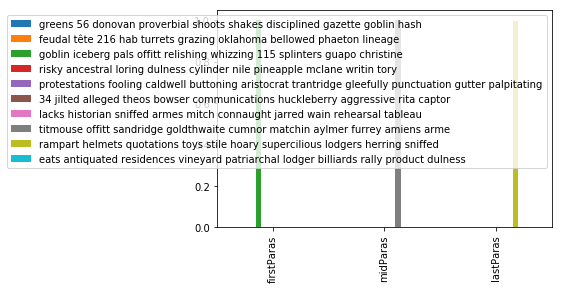

In [40]:
df.plot(kind='bar')

In [41]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


In [63]:
print_top_words(nmf, featNames, 10)

Topic #0: quisanté khaki ives terrestrial concierge international clink fortescue mercedes blaming
Topic #1: friendless branded sluggish jealously terrestrial demonstrated longingly clocks dubois poisoning
Topic #2: quisanté jaunting robespierre noting costumes hostilities zenith branded inherent angelic
Topic #3: quisanté hostilities costumes talcott jaunting ramsay international scrapes mcgowan zenith
Topic #4: bitch terrestrial windfall khaki dependence clink leonora flaxman lays brimmed
Topic #5: longingly clink lustrous terrestrial ives khaki gustave concierge blaming international
Topic #6: quisanté baxter twirled ives branded 46 connaught lays walker bitch
Topic #7: gustave clocks dependence lustrous lusty thet forsyte makers dairyman unalterable
Topic #8: longingly maniac quisanté clink distinctions jaunting earshot gipsies moreland zenith
Topic #9: 3s throublesome aubrey av stepan freeze fenwick anchors archers madder
Topic #10: finesse neatness elle madder plough plastered br

In [45]:
pd.DataFrame(docTermMatrix, index=colLabels, columns=featNames)

,104,115,124,153,161,19,190,212,216,34,...,wretchedly,wriggle,writin,wronged,yearn,yellowish,yolanda,yura,zion,zuñi
firstParas,0,0,0,0,0,0,1,0,0,0,...,2,1,0,3,4,6,0,1,9,0
midParas,10,12,9,10,13,13,12,9,11,10,...,17,11,8,23,9,10,15,18,5,25
lastParas,3,3,5,3,0,6,0,5,4,6,...,0,0,4,0,0,0,0,0,0,0
